In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [ ]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape,ytrain.shape,xtest.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

<Axes: xlabel='0'>

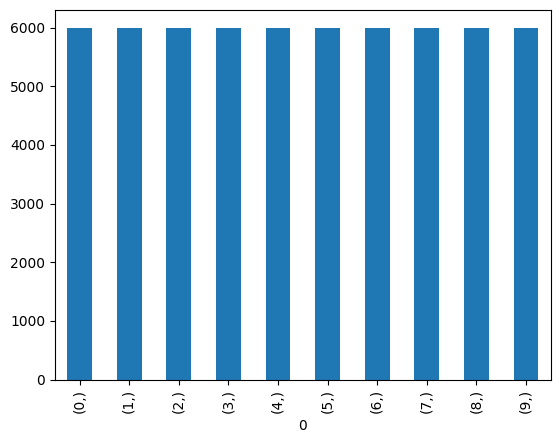

In [ ]:
pd.DataFrame(ytrain).value_counts().plot(kind='bar')

In [ ]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

tag = 9


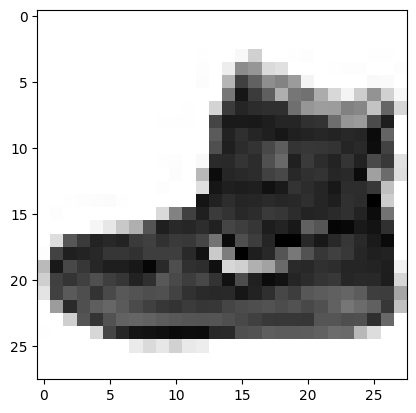

In [ ]:
print('tag = {}'.format(ytrain[0]))
plt.imshow(xtrain[0],cmap = 'Greys')

In [ ]:
#for i in range(0,10):
index = np.random.choice(np.where(ytrain==0)[0],10)
index

array([54070, 35697,  4057, 35970, 57186, 36033, 31632, 35223,  5028,
        3534])

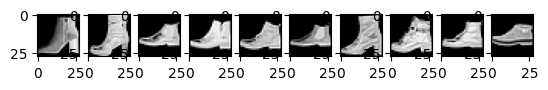

In [320]:
counter = 1
for i in index:
  plt.subplot(1,10,counter)
  plt.imshow(xtrain[i],cmap = 'gray')
  counter += 1

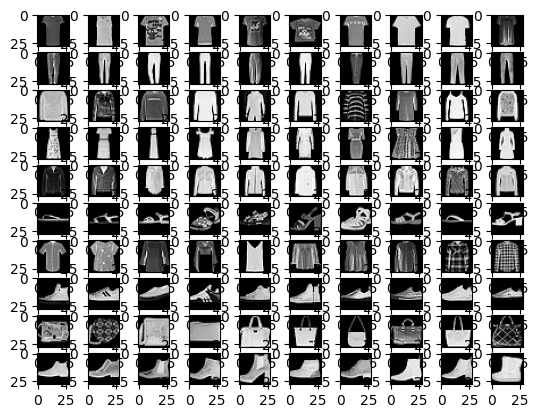

In [323]:
for i in range(0,10):
  index = np.random.choice((np.where(ytrain==i))[0],10)
  counter =1
  for j in index:
    plt.subplot(10,10,i*10+counter)
    plt.imshow(xtrain[j],cmap = 'gray')
    counter += 1

In [ ]:
ind_shirt = np.random.choice(np.where(ytrain == 6)[0],1000)
ind_sneaker = np.random.choice(np.where(ytrain == 7)[0],1000)

In [ ]:
len(xtrain[ind_sneaker[0]][xtrain[ind_sneaker[0]] == 0])#finding no. of zeroes for a single image

540

In [ ]:
#finding no of zeroes in datapoints of shirt images
no_of_zero_shirt = []
for i in ind_shirt:
  no_of_zero_shirt.append(len(xtrain[i][xtrain[i] == 0]))# no. zeroes in random 1000 images of shirt

In [ ]:
#finding no of zeroes in datapoints of sneaker images
no_of_zero_sneaker = []
for i in ind_sneaker:
  no_of_zero_sneaker.append(len(xtrain[i][xtrain[i] == 0]))# mean in random 1000 images of sneaker

In [ ]:
pd.DataFrame(no_of_zero_shirt).describe(),pd.DataFrame(no_of_zero_sneaker).describe()

(                0
 count  1000.00000
 mean    289.03900
 std      62.25968
 min      66.00000
 25%     252.00000
 50%     285.00000
 75%     324.00000
 max     586.00000,
                  0
 count  1000.000000
 mean    520.288000
 std      42.401875
 min     325.000000
 25%     495.750000
 50%     528.000000
 75%     549.000000
 max     612.000000)

Comparing the no. of zeroes of 1000 random sneaker and shirt images we can see that the the overall mean no. of zeroes for sneaker is around 520 with sdev of 42 while that of shirt is 289 and sdev 62. using the mean and sdev we can say that mean no. of zeroes of datapoints for shirt lies in range  165- 413 which is mean +- 2*sdev and that of sneakers lies in 436 - 604 with 95 percent confidence.

In [ ]:
#Creating our manual model using the above infrences
def manual_model(x):
  if len(x[x==0])>=165 and len(x[x==0])<=413:
      print('The image is a shirt')
  elif len(x[x==0])>=436 and len(x[x==0])<=604:
      print('The image is a sneaker')

In [ ]:
#let's pick another image of shirt and a sneaker to check whether our infrences are correct

In [ ]:
index_s = np.random.choice(np.where(ytest == 6)[0])
index_s #random inded for shirt

9904

In [ ]:
shirt = xtest[index_s]

In [ ]:
manual_model(shirt)

The image is a shirt


In [ ]:
index_sn = np.random.choice(np.where(ytest == 7)[0])
index_sn #random inded for sneaker

4089

In [ ]:
sneakers = xtest[index_sn]

In [ ]:
manual_model(sneakers)

The image is a sneaker
